# Sales Analysis

### Import libraries

In [67]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import combinations
from collections import Counter

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


-----------

#### Task 1a: Merge the 12 months of sales data to single csv file

In [68]:
'''import glob
sales_files = glob.glob('./Sales_Data/Sales_*.csv')
df_list = [pd.read_csv(files) for files in sales_files]
data_list = pd.concat(df_list)
data_list.to_csv('all_data.csv', index=False)'''

"import glob\nsales_files = glob.glob('./Sales_Data/Sales_*.csv')\ndf_list = [pd.read_csv(files) for files in sales_files]\ndata_list = pd.concat(df_list)\ndata_list.to_csv('all_data.csv', index=False)"

------

#### Task 1b: Upload new data sheet

In [69]:
url = '/content/drive/MyDrive/projects/data_analysis/sales gadget/'
df = pd.read_csv(f'{url}all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


-------------

#### Task 1c: Clean up the data

In [70]:
# See how many rows of NaN
nan_df = df[df.isna().any(axis=1)]

# Drop rows of NaN
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [71]:
# Find the error value from Month column
df = df[df['Order Date'].str[0:2] != 'Or']

-----------------

#### Task 2a: Investigate Data Frame for titles, data types, and number of columns and rows

In [72]:
df.info

<bound method DataFrame.info of        Order ID  ...                       Purchase Address
0        141234  ...        944 Walnut St, Boston, MA 02215
1        141235  ...       185 Maple St, Portland, OR 97035
2        141236  ...  538 Adams St, San Francisco, CA 94016
3        141237  ...     738 10th St, Los Angeles, CA 90001
4        141238  ...          387 10th St, Austin, TX 73301
...         ...  ...                                    ...
186845   295660  ...      574 4th St, Los Angeles, CA 90001
186846   295661  ...           359 1st St, Austin, TX 73301
186847   295662  ...          900 10th St, Boston, MA 02215
186848   295663  ...        592 Sunset St, Boston, MA 02215
186849   295664  ...       428 Jackson St, Boston, MA 02215

[185950 rows x 6 columns]>

---------------

#### Task 2b: Change the data types of object to number and dates

In [73]:
def to_nums(col:str):
    df[col] = pd.to_numeric(df[col])
    return df[col]

In [74]:
to_nums('Quantity Ordered')
to_nums('Price Each');

----------

#### Task 2c: Add a month column with order date and change it to integer

In [75]:
df['Month'] = df['Order Date'].str[0:2]
to_nums('Month')
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

-----

#### Task 3a: Add sales column and calculate it for the values

In [76]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


----

#### Task 3b: Add the city column

In [77]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


--------------

### What is best month for sales? How much was earned that month?

In [78]:
result_sales = df.groupby('Month').sum()['Sales']
result_sales.sort_values(ascending=False)

Month
12    4.613443e+06
10    3.736727e+06
4     3.390670e+06
11    3.199603e+06
5     3.152607e+06
3     2.807100e+06
7     2.647776e+06
6     2.577802e+06
8     2.244468e+06
2     2.202022e+06
9     2.097560e+06
1     1.822257e+06
Name: Sales, dtype: float64

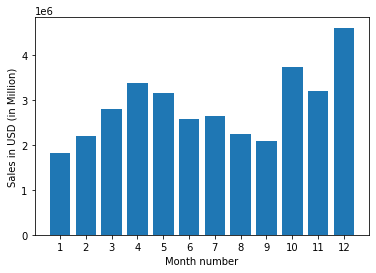

In [79]:
months = range(1,13)
plt.bar(months, result_sales)
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Sales in USD (in Million)')
plt.show()

#### Best Month for Sales:
* April (USD 3.390.670.000)
* October (USD 3.736.727.000)
* December (USD 4.613.443.000)

--------

### What city had the highest number of sales?

In [80]:
result_city_sales = df.groupby('City').sum()['Sales']
result_city_sales.sort_values(ascending=False)

City
 San Francisco (CA)    8.262204e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Boston (MA)           3.661642e+06
 Atlanta (GA)          2.795499e+06
 Dallas (TX)           2.767975e+06
 Seattle (WA)          2.747755e+06
 Portland (OR)         1.870732e+06
 Austin (TX)           1.819582e+06
 Portland (ME)         4.497583e+05
Name: Sales, dtype: float64

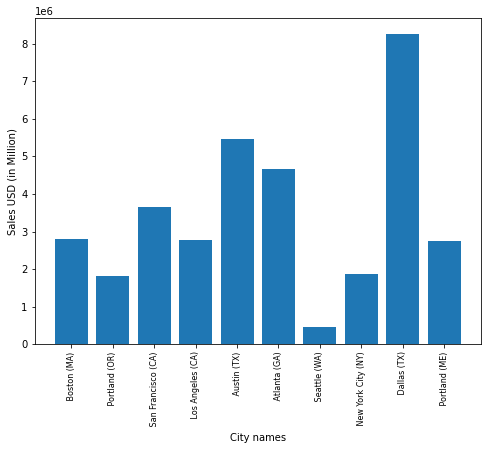

In [81]:
cities = df['City'].unique()

plt.figure(figsize=(8,6))
plt.bar(cities, result_city_sales)
plt.xticks(cities, rotation='vertical', size=8)
plt.xlabel('City names')
plt.ylabel('Sales USD (in Million)')
plt.show()

#### Best City for Highest Sales:
* San Francisco, CA (USD 8.262.204.000)
* Los Angeles, CA (USD 5.452.571.000)
* New York City, NY (USD 4.664.317.000)

-------

### What time should we display advertisement to maximize customer buying product?

In [82]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11,59


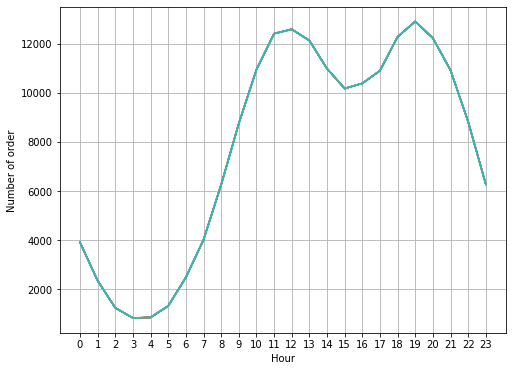

In [83]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.figure(figsize=(8,6))
plt.plot(hours, df.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of order')
plt.show()

#### Best Hour to Display Advertising:
* Display at 11am (11:00)
* Display at 12am (12:00)
* Display at 7pm (19:00)

--------

### What products are most often sold together?

In [90]:
dfl = df.loc[df['Order ID'].duplicated(keep=False)].copy()
dfl['Grouped'] = dfl.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [91]:
dfl = dfl[['Order ID', 'Grouped']].drop_duplicates()
dfl.head(20)

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
228,141457,"iPhone,Apple Airpods Headphones"
250,141478,"Google Phone,Apple Airpods Headphones"
323,141550,"iPhone,Apple Airpods Headphones,Wired Headphones"
362,141587,"USB-C Charging Cable,Apple Airpods Headphones"
421,141645,"Lightning Charging Cable,Wired Headphones"


In [92]:
count = Counter()

for row in dfl['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


---------

### What product sold the most? Why do you think it sold the most?

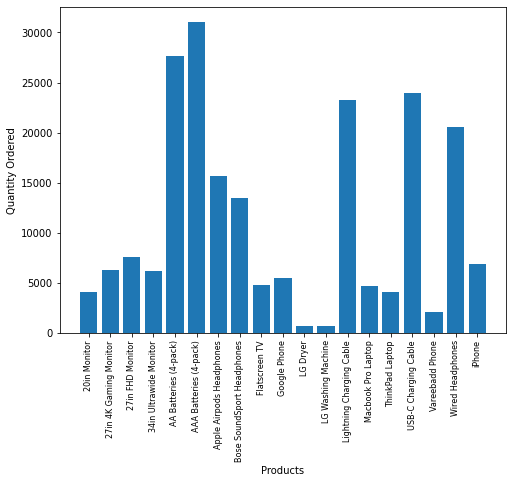

In [93]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.figure(figsize=(8,6))
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

#### The graphic bar showing the most sold products

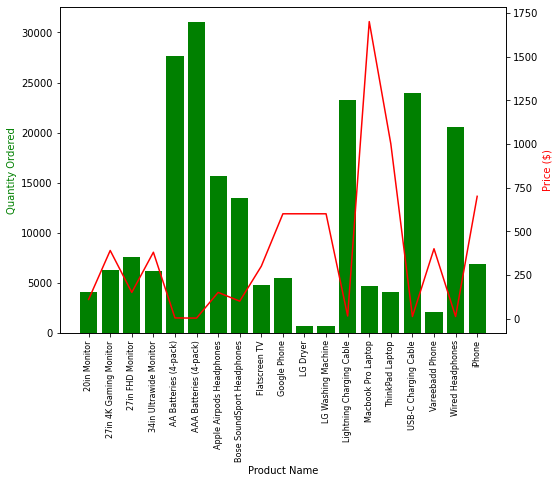

In [94]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='green')
ax2.plot(products, prices, 'red')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='green')
ax2.set_ylabel('Price ($)', color='red')
ax1.set_xticks(products)
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()

#### The graphic bar showing the most sold products with the price